# 2: Linear Regression Exercises

### Getting Started
#### Import Libraries 
We import our standard libraries and specific objects/libraries at the top level of our notebook. By adding only specific objects from key modules, such as `statmodels`, we keep our *namespace* more organized. 

In [2]:
# Import libraries and objects
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings # for muting warning messages
# mute warning messages
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from ISLP import load_data
from ISLP.models import summarize

Let's take a look at the `Boston` data set

In [3]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Hint: Type `Boston?` to find out more about the dataset.

In [12]:
Boston?

Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           0    0.00632  18.0   2.3 <...> 0   5.64  23.9
           504     21.0   6.48  22.0
           505     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        c:\users\dugga\miniconda3\envs\dsi_participant\lib\site-packages\pandas\core\frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is

## Simple Linear Regression

In this section we will construct model matrices (also called design matrices) using the `ModelSpec()` transform from `ISLP.models`. 

We will use the `Boston` housing data set, which is part of the `ISLP` package. We will build a regression model to predict `medv` using 13 predictors such as `rmvar` (average number of rooms per house), `age` (proportion of owner-occupied units built prior to 1940), and `lstat` (percent of households with low socioeconomic status). We will use the `statsmodels` package, which allows us to implement several commonly used regression methods.

To start, we use the `sm.OLS()` function to fit a simple linear regression model. Our response will be `medv` (Y) and `rm` (X) will be the single predictor. For this model, we can create the model matrix by hand.

In [4]:
# Create the model matrix by hand
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'rm': Boston['rm']})
X[:4]

,intercept,rm
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998


We then extract the response and fit the model.

In [5]:
# Extract the response and fit the model
y = Boston['medv']
model = sm.OLS(y, X) # to specify the model
results = model.fit() # to fit the model

**Note**: `sm.OLS()` does not fit the model; it specifies the model. `model.fit()` does the actual fitting.

The `ISLP` function `summarize()` produces a simple table of the parameter estimates, their standard errors, t-statistics and p-values. The function takes a single argument, such as the object `results` returned here by the `fit` method, and returns such a summary.

In [6]:
# Summarize results
summarize(results)

,coef,std err,t,P>|t|
intercept,-34.6706,2.650,-13.084,0.0
rm,9.1021,0.419,21.722,0.0


The output tells us that ˆβ0 = −34.6706 and ˆβ1 = 9.1021

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.49e-74
Time:                        20:43:41   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted coefficients can also be retrieved as the params attribute of results.

In [8]:
coefficients = results.params
print(coefficients)

intercept   -34.670621
rm            9.102109
dtype: float64


To compute the 95% confidence intervals for the regression coefficient estimates based on the standard errors:

In [9]:
# Get confidence intervals for coefficients
conf_intervals = results.conf_int()

# Print the confidence intervals
print("Confidence Intervals for Coefficients:")
print(conf_intervals)

Confidence Intervals for Coefficients:
                   0          1
intercept -39.876641 -29.464601
rm          8.278855   9.925363


We can also find the RSE and $R^2$ statistic in the summary of the linear regression model.

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.49e-74
Time:                        20:43:42   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6706      2.650    -13.084      0.0

From the $R^2$ statistic we can see that some of the variation in `medv` is explained by `rm` but a lot of it is not. This might be an indication that there are other variables in the data set that are affecting the response.

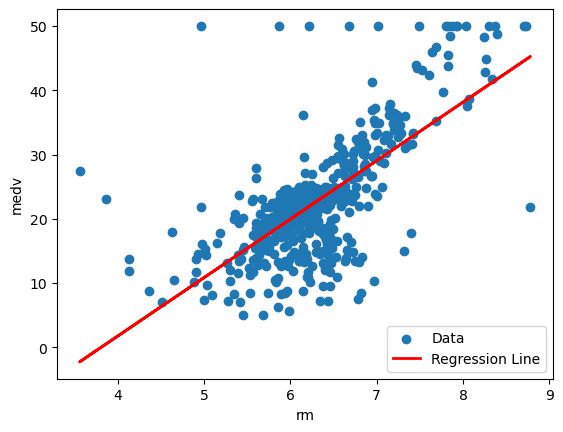

In [11]:
# Extracting 'medv' and 'rm' columns from the dataset
medv = Boston['medv']
rm = Boston['rm']

# Reshape 'rm' to a 2D array for LinearRegression
rm_reshaped = rm.values.reshape(-1, 1)

# Fit a linear regression model
lm_medv_rm = LinearRegression()
lm_medv_rm.fit(rm_reshaped, medv)

# Plot 'medv' against 'rm'
plt.scatter(rm, medv, label='Data')
plt.xlabel('rm')
plt.ylabel('medv')

# Plot the regression line
plt.plot(rm, lm_medv_rm.predict(rm_reshaped), color='red', linewidth=2, label='Regression Line')

plt.legend()
plt.show()

*These exercises were adapted from :* James, Gareth, et al. An Introduction to Statistical Learning: with Applications in Python, Springer, 2023.